In [214]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [215]:
filepath=r"C:\Users\sande\Downloads\Zomatodataset\zomato.csv"

In [216]:
import chardet
with open(filepath, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result


{'encoding': 'Windows-1254',
 'confidence': 0.49068171335281274,
 'language': 'Turkish'}

In [217]:
df=pd.read_csv(filepath,encoding="latin1")

In [218]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [220]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [221]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [222]:
df.isnull().sum().sum()

9

In [223]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

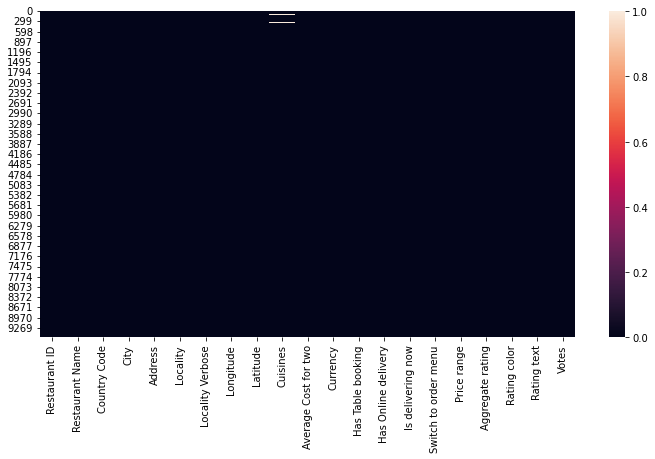

In [224]:
plt.figure(figsize=(12,6))
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.heatmap(df.isnull())

In [225]:
#reading county code table

In [226]:
df_code=pd.read_excel(r"C:\Users\sande\Downloads\Zomatodataset\Country-Code.xlsx")

In [227]:
df_code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [228]:
#combining to tables using merge or join or concat 
cd = pd.merge(df,df_code,on='Country Code',how="left")


In [229]:
#combining data using join &concat
#cd=pd.concat([df,df_code],join='outer',axis=0)
#cd=df.join(df_code)
#append , joins vertically 
cd.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [230]:
#cd.sort_values('Country Code').head()

In [231]:
#cd['Country'].value_counts()
cd.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [232]:
country_names = cd.Country.value_counts().index
country_values=cd.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x2d392be6200>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

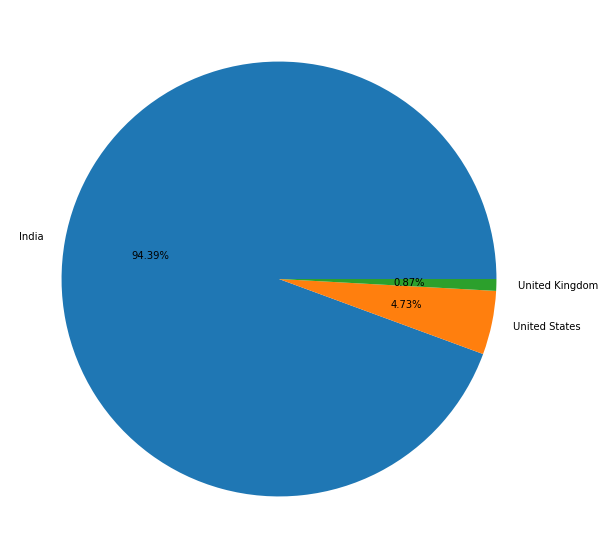

In [233]:
#plot a pie chart to know top 5 country using zomato
plt.figure(figsize=(16,10))
plt.pie(country_values[:3],labels=country_names[:3],autopct='%1.2f%%')

Observation : 94% of zomato clients are from India 

In [234]:
cd.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [235]:
ratings=cd.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:"rating count"})

In [236]:
## observation 
#rating=ratings['Rating color'].replace('White','Blue')

<AxesSubplot:xlabel='Aggregate rating', ylabel='rating count'>

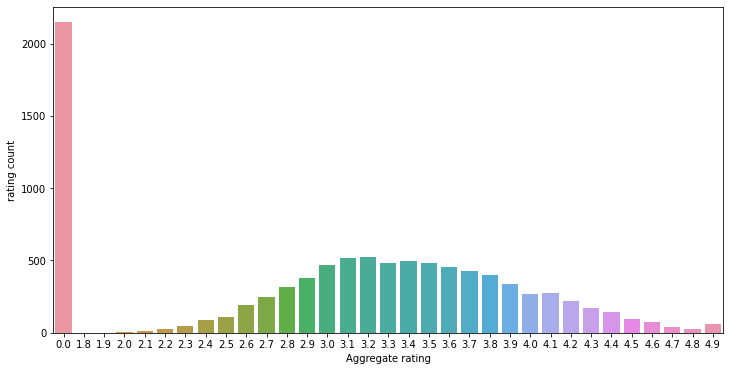

In [237]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='rating count', data=ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='rating count'>

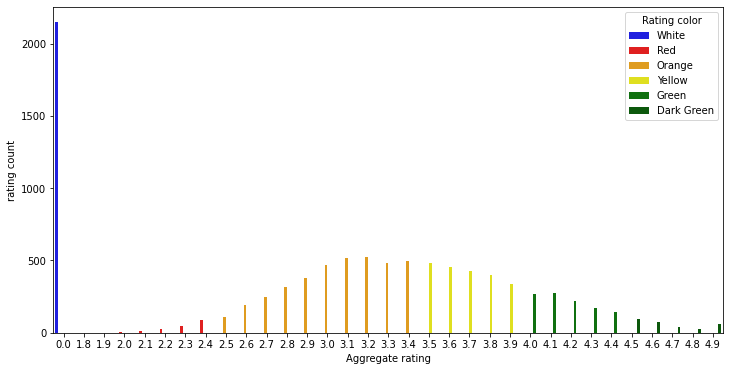

In [238]:
#barplot based on rating_color
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='rating count',data=ratings,hue='Rating color',palette=['blue','red','orange','yellow','green','darkgreen'])

Observations
1.more number of not rated orders
2.mXIMUM RARINGS ARE BETWEEN 2.7 TO 4.1


<AxesSubplot:xlabel='Rating color', ylabel='count'>

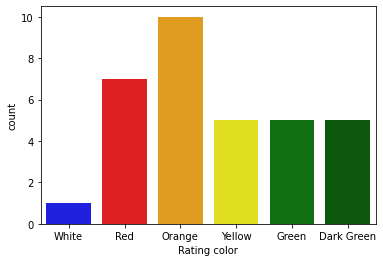

In [239]:
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','darkgreen'])

In [241]:
#find the countries name that has given 0 ratings 
#[c_name for c_name in cd.Country if cd['Aggregate rating'] == 0]

countries name that has given 0 ratings 

In [243]:
cd[cd['Aggregate rating']==0]['Country'].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [258]:
zero_ratings=cd[cd['Aggregate rating']==0].groupby(['Country']).size().reset_index().rename(columns={0:'rating count'})
zero_ratings

,Country,rating count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [256]:
zero_ratings=cd.groupby(['Aggregate rating','Country']).size().reset_index().rename(columns={0:'rating count'})
zero_ratings

,Aggregate rating,Country,rating count
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
...,...,...,...
217,4.9,Sri Lanka,1
218,4.9,Turkey,3
219,4.9,UAE,4
220,4.9,United Kingdom,4


In [252]:
cd['Aggregate rating'].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

<AxesSubplot:xlabel='Country', ylabel='rating count'>

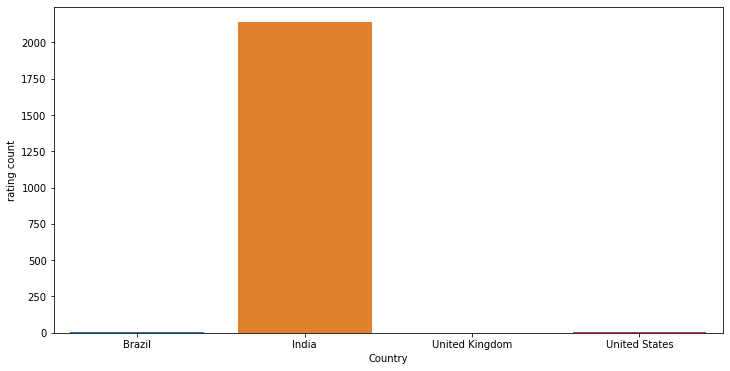

In [255]:
plt.figure(figsize=(12,6))
sns.barplot(x='Country',y='rating count', data=zero_ratings)

([<matplotlib.patches.Wedge at 0x2d395ba91e0>,
 [Text(1.0999705051678585, 0.008055293959007821, 'Brazil'),
  Text(-1.0999811229433283, -0.0064443128675329, 'India'),
  Text(1.0999988203684543, -0.0016109587236330801, 'United Kingdom')],
 [Text(0.599983911909741, 0.004393796704913356, '0.23%'),
  Text(-0.5999897034236336, -0.0035150797459270362, '99.72%'),
  Text(0.5999993565646113, -0.0008787047583453163, '0.05%')])

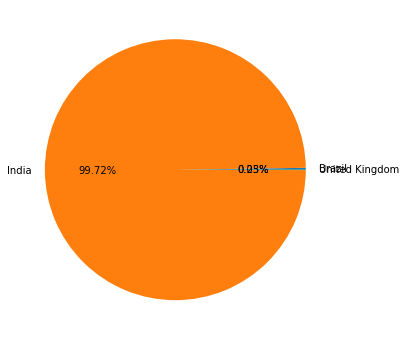

In [261]:
plt.figure(figsize=(12,6))
plt.pie(labels=zero_ratings['Country'][:3],x=zero_ratings['rating count'][:3],autopct='%1.2f%%')

find which currency is used by which country 

In [262]:
cd.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [263]:
c=cd[['Country','Currency']].value_counts().reset_index()

In [264]:
c[['Country','Currency']]

,Country,Currency
0,India,Indian Rupees(Rs.)
1,United States,Dollar($)
2,United Kingdom,Pounds(£)
3,Brazil,Brazilian Real(R$)
4,South Africa,Rand(R)
5,UAE,Emirati Diram(AED)
6,New Zealand,NewZealand($)
7,Turkey,Turkish Lira(TL)
8,Australia,Dollar($)
9,Phillipines,Botswana Pula(P)


which country has online delivery option 

In [265]:
cd[cd['Has Online delivery']=='Yes'].Country.value_counts().reset_index()

,index,Country
0,India,2423
1,UAE,28


In [266]:
cd.groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


find which cities are doing more transactions 

([<matplotlib.patches.Wedge at 0x2d395bf5120>,
 [Text(-0.6836225695617262, 0.8617773392157762, 'New Delhi'),
  Text(0.24897482286810813, -1.0714530029720364, 'Gurgaon'),
  Text(0.9941442744692855, -0.47082604169686504, 'Noida')],
 [Text(-0.37288503794275973, 0.47006036684496877, '71.35%'),
  Text(0.13580444883714987, -0.5844289107120197, '14.57%'),
  Text(0.542260513346883, -0.25681420456192633, '14.08%')])

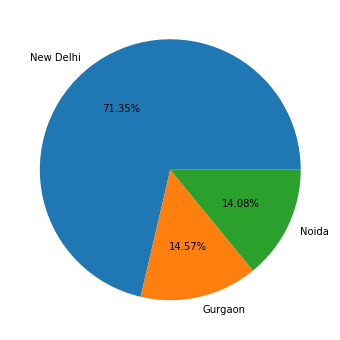

In [267]:
city_names = cd.City.value_counts().index
city_values=cd.City.value_counts().values
plt.figure(figsize=(12,6))
plt.pie(city_values[:3],labels=city_names[:3],autopct='%1.2f%%')

top 10 cuisines 

In [268]:
cd['Cuisines'].value_counts().head(10)

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64